In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import mshr
import numpy as np
import scipy.integrate as integrate
from fenics import *

In [2]:
# local imports
from modules.mesh_utils import get_mesh
from modules.physics_utils import get_VandE, compute_trajectory_bigN, compute_trajectory_smallN
#from modules.plotting_utils import ?

In [3]:
# defining dicts, we need L_mot-L_1 < 2*l_mot !
mesh_dict = {
    'L_mot' : .01,
    'l_mot' : .003,
    'L_1' : .0045,
    'l_1': .005,
    'L_2' : .007,
    'l_2' : .015,
    'delta_vert_12' : .005,
    'L_vacuum' : .1,
    'l_vacuum': .05,
    'mesh_resolution' : 100,
    'refine_mesh' : True,
}

phi_dict = {
    'Phi_top_mot' : 0,
    'Phi_bord_mot': 'N',
    'Phi_electrode1' :100,
    'Phi_inter_electrode':'N',
    'Phi_electrode2':300,
    'Phi_sup_vacuum':'N',
    'Phi_inf_vacuum':'N',
}

physics_consts_dict = {
    'rhoelec': 0,
    'PERMITTIVITY' : 8.54e-12,
}

In [4]:
# using local import to create the mesh
mesh, segments_list, zone = get_mesh(mesh_dict)

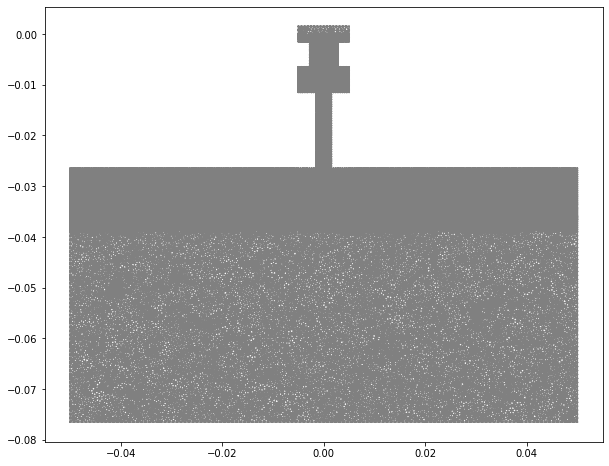

In [5]:
plt.figure(figsize=(10,10))
plot(mesh)
plt.show()

# E and V computations

In [6]:
# E computation
# We use functions defined in the *physics_utils.py* module.
Phi, E = get_VandE(mesh, mesh_dict, phi_dict, physics_consts_dict)
Ex, Ey = E.split(deepcopy=True)
NE=sqrt(dot(E,E))

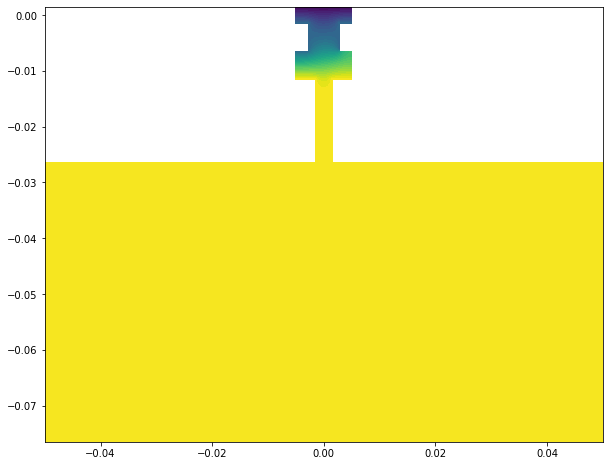

In [7]:
plt.figure(figsize=(10,10))
plot(Phi)
plt.show()

In [9]:
integration_parameters_dict = {
    'tmax' : .00001,
    'dt' : .0000001,
}


injection_dict = {
    'Nombre de particules':10,
    'proportion de I':0,
    'proportion de I+':0,
    'proportion de I-':1,
    'débit de particule en entrée de la grille':1e9,
}

mode_dict={
    'Elastique?':True,
    'Transfert de charge?':True,
    'Contact inter particules?':False,
    'perte u par contact':0.05,
    'proba perte q par contact':0.4,
}

In [10]:
#liste_pf, liste_alpha, liste_V, listes_x, listes_y, listes_vx, listes_vy, listes_q, liste_t = \
#compute_trajectory_smallN(integration_parameters_dict, injection_dict, mesh_dict, mode_dict, segments_list, zone, E)

début d'initialisation
début de l'injection
toutes les particules sont injectées
Avancement de 3.9999999999999964%, 0 particules sorties
Avancement de 5.999999999999995%, 0 particules sorties
Avancement de 9.99999999999999%, 0 particules sorties
fin du calcul, critère d'arret: Nb_out
début traitement de données


/Users/edouardroger/opt/anaconda3/envs/fenicsproject/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/edouardroger/opt/anaconda3/envs/fenicsproject/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [10]:
#liste_pf, liste_alpha, liste_V = \
#compute_trajectory_bigN(integration_parameters_dict, injection_dict, mesh_dict, mode_dict, segments_list, zone,E)

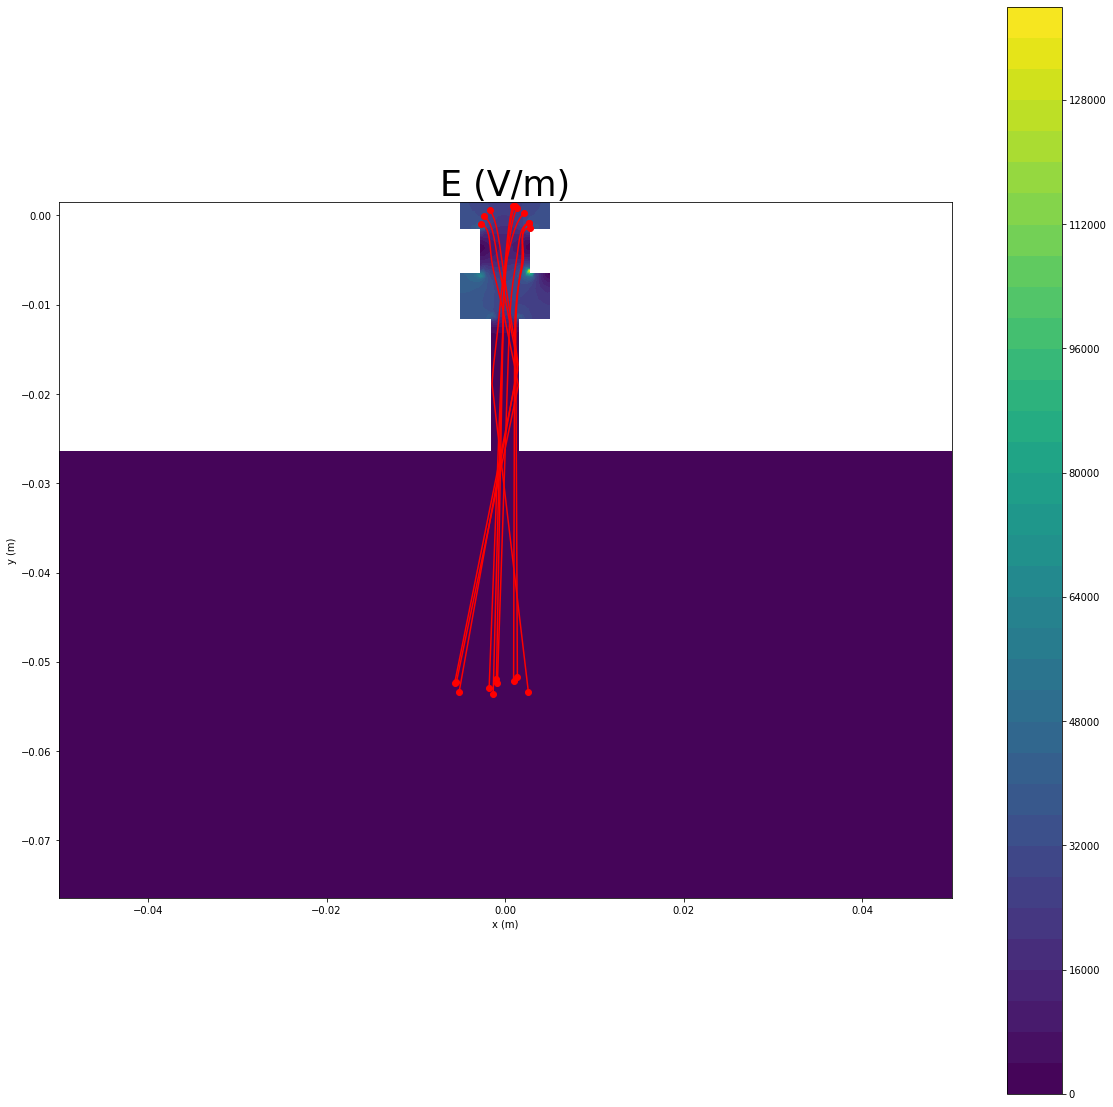

In [12]:
plt.figure(figsize=(20,20))
fig=plot(NE)
for i in range (injection_dict['Nombre de particules']):
    plt.plot(listes_x[i],listes_y[i],linestyle='-',color='r')
    plt.scatter(listes_x[i][0],listes_y[i][0],color='r')
    plt.scatter(listes_x[i][-1],listes_y[i][-1],color='r')
plt.title('E (V/m)', size=35)
plt.xlabel('x (m)',size=10)
plt.ylabel('y (m)',size=10)
fig.set_cmap("viridis")
plt.colorbar(fig)
plt.show()

0